## Sberbank Russian Housing Market
##### Group member: Ying Zhang, Zhian Wang

In [1]:
wd = "/Users/zwang/GWU/Kaggle/Housing_Mkt/data"
import pandas as pd
import numpy as np
train_df = pd.read_csv(wd+"/train.csv")
train_df = train_df.reset_index(drop=True)
test_df = pd.read_csv(wd+"/test.csv")
test_df = test_df.reset_index(drop=True)

### Data Preparation

In [2]:
# Remove the outlier of full_sq
ind = train_df[train_df['full_sq'] > 2000].index
train_df = train_df.drop(ind)

In [3]:
# Remove the outliter in life_sq
ind = train_df[train_df['life_sq'] > 2000].index
train_df = train_df.drop(ind)

In [4]:
# Remove the outliter in kitch_sq
ind = train_df[train_df['kitch_sq'] > 500].index
train_df = train_df.drop(ind)

In [5]:
(train_df['life_sq'] > train_df['full_sq']).sum()
life_sq = train_df['life_sq'].ix[train_df['life_sq'] < train_df['full_sq']].median()
full_sq = train_df['full_sq'].median()
life_full = life_sq/full_sq 
life_full
train_df['life_sq'].ix[train_df['life_sq'] > train_df['full_sq']] = train_df['full_sq']*life_full
(train_df['life_sq'] > train_df['full_sq']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [6]:
(test_df['life_sq'] > test_df['full_sq']).sum()
life_sq = test_df['life_sq'].ix[test_df['life_sq'] < test_df['full_sq']].median()
full_sq = test_df['full_sq'].median()
life_full = life_sq/full_sq 
life_full
test_df['life_sq'].ix[test_df['life_sq'] > test_df['full_sq']] = test_df['full_sq']*life_full
(test_df['life_sq'] > test_df['full_sq']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [7]:
kitch_sq = train_df['kitch_sq'].ix[train_df['kitch_sq'] < train_df['full_sq']].median()
full_sq = train_df['full_sq'].median()
kitch_full = kitch_sq/full_sq 
kitch_full
train_df['kitch_sq'].ix[train_df['kitch_sq'] > train_df['full_sq']] = train_df['full_sq']*kitch_full
(train_df['kitch_sq'] > train_df['full_sq']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [8]:
kitch_sq = test_df['kitch_sq'].ix[test_df['kitch_sq'] < test_df['full_sq']].median()
full_sq = test_df['full_sq'].median()
kitch_full = kitch_sq/full_sq 
kitch_full
test_df['kitch_sq'].ix[test_df['kitch_sq'] > test_df['full_sq']] = test_df['full_sq']*kitch_full
(test_df['kitch_sq'] > test_df['full_sq']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [9]:
train_df['floor'].ix[train_df['floor'] > train_df['max_floor']] = train_df['max_floor']*0.5
(train_df['floor'] > train_df['max_floor']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [10]:
test_df['floor'].ix[test_df['floor'] > test_df['max_floor']] = test_df['max_floor']*0.5
(test_df['floor'] > test_df['max_floor']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [11]:
train_df.loc[train_df['state'] == 33, 'state'] = train_df['state'].mode().iloc[0]

In [12]:
train_df.loc[train_df['build_year'] == 20052009, 'build_year'] = 2007
ind = train_df[(train_df['build_year'] <= 1691) | (train_df['build_year'] >= 2018)].index
by_df = train_df.drop(ind).sort_values(by=['build_year'])

### Impute Missing Value

In [13]:
train_na = train_df.isnull().sum()
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
train_na_list = train_na.index.tolist()
train_na_list

['hospital_beds_raion',
 'build_year',
 'state',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'max_floor',
 'material',
 'num_room',
 'kitch_sq',
 'preschool_quota',
 'school_quota',
 'cafe_sum_1000_max_price_avg',
 'cafe_sum_1000_min_price_avg',
 'cafe_avg_price_1000',
 'life_sq',
 'build_count_before_1920',
 'build_count_block',
 'raion_build_count_with_material_info',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_1971-1995',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_after_1995',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_avg',
 'cafe_sum_2000_max_price_avg',
 'cafe_avg_price_2000',
 'cafe_sum_3000_min_price_avg',
 'cafe_sum_3000_max_price_avg',
 'cafe_avg_price_3000',


In [14]:
train_df = train_df.fillna(train_df.mean())

In [15]:
test_df = test_df.fillna(test_df.mean())

#### Add some features

In [16]:
def add_features(df):
    
    #Floor
    df['floor_ratio'] = df['floor'] / df['max_floor'].astype(float)
    df['floor_from_top'] = df['max_floor'] - df['floor']
    #Sq areas
    df['kitch_sq_ratio'] = df['kitch_sq'] / df['full_sq'].astype(float)
    df['life_sq_ratio'] = df['life_sq'] / df['full_sq'].astype(float)
    df['full_sq_per_room'] = df['full_sq'] / df['num_room'].astype(float)
    df['life_sq_per_room'] = df['life_sq'] / df['num_room'].astype(float)
    df['full_living_sq_diff'] = df['full_sq'] - df['life_sq']

    #Date
    df["year"] = pd.to_datetime(df["timestamp"], coerce=True).dt.year
    df["month"] = pd.to_datetime(df["timestamp"], coerce=True).dt.month
    df["day"] = pd.to_datetime(df["timestamp"], coerce=True).dt.day
    df["dayofyear"] = pd.to_datetime(df["timestamp"], coerce=True).dt.dayofyear
    df["dayofweek"] = pd.to_datetime(df["timestamp"], coerce=True).dt.dayofweek
    df["weekofyear"] = pd.to_datetime(df["timestamp"], coerce=True).dt.weekofyear
    
    # Add month-year
    month_year = (df['month'] + df['year'] * 100)
    month_year_cnt_map = month_year.value_counts().to_dict()
    df['month_year_cnt'] = month_year.map(month_year_cnt_map)
    
    # Add week-year count
    week_year = (df["weekofyear"] + df['year'] * 100)
    week_year_cnt_map = week_year.value_counts().to_dict()
    df['week_year_cnt'] = week_year.map(week_year_cnt_map)
    
    # building 
    df["year_old"] = 2020- df["build_year"]
    

    return df

In [17]:
train_df = add_features(train_df)
test_df = add_features(test_df)

print(train_df.shape)
print(test_df.shape)

(30464, 308)
(7662, 307)


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:18: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead


In [18]:
# Remove timestamp column (may overfit the model in train)
train_df.drop(['timestamp'], axis=1, inplace=True)
test_df.drop(['timestamp'], axis=1, inplace=True)

In [19]:
train_df.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,full_living_sq_diff,year,month,day,dayofyear,dayofweek,weekofyear,month_year_cnt,week_year_cnt,year_old
0,1,43,27.0,4.0,12.559613,1.826736,1879.239962,1.909826,5.970745,2.105288,...,16.0,2011,8,20,232,5,33,3,1,140.760038
1,2,34,19.0,3.0,12.559613,1.826736,1879.239962,1.909826,5.970745,2.105288,...,15.0,2011,8,23,235,1,34,3,2,140.760038
2,3,43,29.0,2.0,12.559613,1.826736,1879.239962,1.909826,5.970745,2.105288,...,14.0,2011,8,27,239,5,34,3,2,140.760038
3,4,89,50.0,9.0,12.559613,1.826736,1879.239962,1.909826,5.970745,2.105288,...,39.0,2011,9,1,244,3,35,39,1,140.760038
4,5,77,77.0,4.0,12.559613,1.826736,1879.239962,1.909826,5.970745,2.105288,...,0.0,2011,9,5,248,0,36,39,5,140.760038


#### Log the price

In [ ]:
#train_df['price_doc_log'] = np.log1p(train_df['price_doc'])

### Variable importance

In [ ]:
"""
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
X_train = train_df.drop(labels=['timestamp', 'id', 'incineration_raion'], axis=1).dropna()
y_train = X_train['price_doc_log']
X_train.drop('price_doc_log', axis=1, inplace=True)
for f in X_train.columns:
    if X_train[f].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(X_train[f])
        X_train[f] = lbl.transform(X_train[f])
rf = RandomForestRegressor(random_state=0)
rf = rf.fit(X_train, y_train)
"""

In [ ]:
"""
fi = list(zip(X_train.columns, rf.feature_importances_))
print('## rf variable importance')
d = [print('## %-40s%s' % (i)) for i in fi[:30]]
"""

In [ ]:
#print(fi[:30])

In [ ]:
#[i[0] for i in fi[:30]]

In [ ]:
#train_df = train_df.drop('price_doc_log',axis = 1)

## Model

In [20]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch 
from h2o.estimators.xgboost import H2OXGBoostEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
import xgboost as xgb
h2o.init(nthreads=-1, max_mem_size="4g") # give h2o as much memory as possible
h2o.no_progress() # turn off h2o progress bars

import numpy as np
import pandas as pd

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_131"; Java(TM) SE Runtime Environment (build 1.8.0_131-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.131-b11, mixed mode)
  Starting server from /anaconda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/4r/5_zmhl8n2y90_l2743gnnbj00000gn/T/tmpecf7p0xu
  JVM stdout: /var/folders/4r/5_zmhl8n2y90_l2743gnnbj00000gn/T/tmpecf7p0xu/h2o_zwang_started_from_python.out
  JVM stderr: /var/folders/4r/5_zmhl8n2y90_l2743gnnbj00000gn/T/tmpecf7p0xu/h2o_zwang_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster version:,3.12.0.1
H2O cluster version age:,17 days
H2O cluster name:,H2O_from_python_zwang_uw3og7
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [21]:
print(train_df.shape)
print(test_df.shape)

(30464, 307)
(7662, 306)


In [22]:
train = h2o.H2OFrame(train_df)
test = h2o.H2OFrame(test_df)

dummy_col = np.random.rand(test.shape[0])
test = test.cbind(h2o.H2OFrame(dummy_col))
cols = test.columns
cols[-1] = 'price_doc'
test.columns = cols
print(train.shape)
print(test.shape)

(30464, 307)
(7662, 307)


In [23]:
def get_type_lists(frame=train, rejects=['id', 'price_doc']):   
    nums, cats = [], []
    for key, val in frame.types.items():
        if key not in rejects:
            if val == 'enum':
                cats.append(key)
            else: 
                nums.append(key)                
    print('Numeric =', nums)                
    print()
    print('Categorical =', cats)
    
    return nums, cats

In [24]:
original_nums, cats = get_type_lists()

Numeric = ['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_

In [25]:
train, valid = train.split_frame([0.7], seed=12345)
print(train.shape)
print(valid.shape)

(21378, 307)
(9086, 307)


### Encode categorical vars using shrunken averages

In [26]:
def target_encoder(training_frame, test_frame, x, y, lambda_=0.15, threshold=150, test=False):

    # convert to pandas
    trdf = training_frame.as_data_frame().loc[:, [x,y]] # df
    tss = test_frame.as_data_frame().loc[:, x]          # series


    # create dictionary of level:encode val

    encode_name = x + '_Tencode'
    overall_mean = trdf[y].mean()
    row_val_dict = {}

    for level in trdf[x].unique():
        level_df = trdf[trdf[x] == level][y]
        level_n = level_df.shape[0]
        level_mean = level_df.mean()
        if level_n >= threshold:
            row_val_dict[level] = level_mean
        else:
            row_val_dict[level] = ((1 - lambda_) * level_mean) +\
                                  (lambda_ * overall_mean)

    row_val_dict[np.nan] = overall_mean # handle missing values

    if test:
        print(row_val_dict)

    # apply the transform to training data
    trdf[encode_name] = trdf[x].apply(lambda i: row_val_dict[i])

    # apply the transform to test data
    tsdf = pd.DataFrame(columns=[x, encode_name])
    tsdf[x] = tss
    tsdf.loc[:, encode_name] = overall_mean # handle previously unseen values
    # handle values that are seen in tsdf but not row_val_dict
    for i, col_i in enumerate(tsdf[x]):
        try:
            row_val_dict[col_i]
        except:
            # a value that appeared in tsdf isn't in the row_val_dict so just
            # make it the overall_mean
            row_val_dict[col_i] = overall_mean
    tsdf[encode_name] = tsdf[x].apply(lambda i: row_val_dict[i])


    # convert back to H2O

    trdf = h2o.H2OFrame(trdf[encode_name].as_matrix())
    trdf.columns = [encode_name]

    tsdf = h2o.H2OFrame(tsdf[encode_name].as_matrix())
    tsdf.columns = [encode_name]

    return (trdf, tsdf)

In [27]:
total = len(cats)
for i, var in enumerate(cats):
    
    tr_enc, _ = target_encoder(train, test, var, 'price_doc')
    v_enc, ts_enc = target_encoder(valid, test, var, 'price_doc')
    
    print('Encoding: ' + var + ' (' + str(i+1) + '/' + str(total) + ') ...')

    train = train.cbind(tr_enc)
    valid = valid.cbind(v_enc)
    test = test.cbind(ts_enc)    
    
print('Done.')

Encoding: product_type (1/15) ...
Encoding: sub_area (2/15) ...
Encoding: culture_objects_top_25 (3/15) ...
Encoding: thermal_power_plant_raion (4/15) ...
Encoding: incineration_raion (5/15) ...
Encoding: oil_chemistry_raion (6/15) ...
Encoding: radiation_raion (7/15) ...
Encoding: railroad_terminal_raion (8/15) ...
Encoding: big_market_raion (9/15) ...
Encoding: nuclear_reactor_raion (10/15) ...
Encoding: detention_facility_raion (11/15) ...
Encoding: water_1line (12/15) ...
Encoding: big_road1_1line (13/15) ...
Encoding: railroad_1line (14/15) ...
Encoding: ecology (15/15) ...
Done.


In [28]:
encoded_nums, cats = get_type_lists(frame=train)

Numeric = ['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_

### Log the price

price_doc
15.582
15.6073
15.556


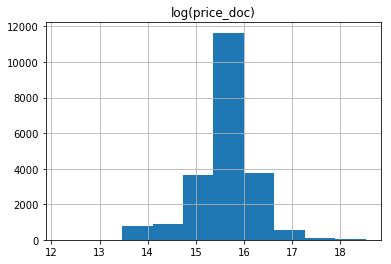

In [29]:
# Check log transform - looks good
%matplotlib inline
train['price_doc'].log().as_data_frame().hist()

# Execute log transform
train['price_doc'] = train['price_doc'].log()
valid['price_doc'] = valid['price_doc'].log()
print(train[0:3, 'price_doc'])
#print(valid[0:3, 'price_doc'])

In [30]:
print(train.shape)
print(valid.shape)
print(test.shape)

(21378, 322)
(9086, 322)
(7662, 322)


#### Define ranked predictions plot function

In [31]:
def ranked_preds_plot(y, valid, preds):
    
    """ Generates ranked prediction plot.
    
    :param y: Name of target variable.
    :param valid: Name of validation H2OFrame.
    :param preds: Column vector of predictions to plot.

    """
    
    # plot top frame values
    preds.columns = ['predict']
    yhat_frame = valid.cbind(preds)
    print(yhat_frame[0:10, [y, 'predict']])

    # plot sorted predictions
    yhat_frame_df = yhat_frame[[y, 'predict']].as_data_frame()
    yhat_frame_df.sort_values(by='predict', inplace=True)
    yhat_frame_df.reset_index(inplace=True, drop=True)
    _ = yhat_frame_df.plot(title='Ranked Predictions Plot')

### Variable importance

In [ ]:
# initialize rf model
rf_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    seed=12345)           

# train rf model
rf_model1.train(
    x=encoded_nums,
    y='price_doc',
    training_frame=train,
    validation_frame=valid)

# print model information
print(rf_model1)

rf_preds1_val = rf_model1.predict(valid)
ranked_preds_plot('price_doc', valid, rf_preds1_val) # valid RMSE not so hot ...
rf_preds1_test = rf_model1.predict(test)

In [ ]:
l = rf_model1.varimp()
FI = [i[0] for i in l[:50]]

In [ ]:
print(FI)

In [32]:
# 50
FI = ['full_sq', 'num_room', 'full_living_sq_diff', 'sub_area_Tencode', 'life_sq', 'kitch_sq_ratio', 'cafe_count_3000_price_2500', 'full_sq_per_room', 'cafe_count_3000', 'cafe_count_5000_price_high', 'cafe_count_2000', 'kitch_sq', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_1500', 'sport_count_3000', 'sport_count_2000', 'cafe_count_5000', 'zd_vokzaly_avto_km', 'life_sq_per_room', 'cafe_count_2000_price_1000', 'cafe_count_1500_price_2500', 'build_year', 'swim_pool_km', 'office_sqm_5000', 'trc_count_5000', 'metro_min_avto', 'metro_km_walk', 'floor', 'nuclear_reactor_km', 'metro_km_avto', 'workplaces_km', 'week_year_cnt', 'max_floor', 'life_sq_ratio', 'cafe_count_3000_price_1500', 'ttk_km', 'green_zone_km', 'trc_count_3000', 'metro_min_walk', 'cafe_count_5000_price_1000', 'year', 'market_shop_km', 'month_year_cnt', 'year_old', 'cafe_count_3000_price_500', 'cafe_count_2000_price_2500', 'bulvar_ring_km', 'detention_facility_km', 'state', 'big_road1_km']

In [33]:
print(FI)

['full_sq', 'num_room', 'full_living_sq_diff', 'sub_area_Tencode', 'life_sq', 'kitch_sq_ratio', 'cafe_count_3000_price_2500', 'full_sq_per_room', 'cafe_count_3000', 'cafe_count_5000_price_high', 'cafe_count_2000', 'kitch_sq', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_1500', 'sport_count_3000', 'sport_count_2000', 'cafe_count_5000', 'zd_vokzaly_avto_km', 'life_sq_per_room', 'cafe_count_2000_price_1000', 'cafe_count_1500_price_2500', 'build_year', 'swim_pool_km', 'office_sqm_5000', 'trc_count_5000', 'metro_min_avto', 'metro_km_walk', 'floor', 'nuclear_reactor_km', 'metro_km_avto', 'workplaces_km', 'week_year_cnt', 'max_floor', 'life_sq_ratio', 'cafe_count_3000_price_1500', 'ttk_km', 'green_zone_km', 'trc_count_3000', 'metro_min_walk', 'cafe_count_5000_price_1000', 'year', 'market_shop_km', 'month_year_cnt', 'year_old', 'cafe_count_3000_price_500', 'cafe_count_2000_price_2500', 'bulvar_ring_km', 'detention_facility_km', 'state', 'big_road1_km']


### Create combination features

In [34]:
def feature_combiner(training_frame, test_frame, nums):
    total = len(nums)
    
    # convert to pandas
    train_df = training_frame.as_data_frame()
    test_df = test_frame.as_data_frame()
    
    for i, col_i in enumerate(nums):
        
        print('Combining: ' + col_i + ' (' + str(i+1) + '/' + str(total) + ') ...')        
        
        for j, col_j in enumerate(nums):
            
            # don't repeat (i*j = j*i)
            if i < j:
                
                # convert to pandas
                col_i_train_df = train_df[col_i]
                col_j_train_df = train_df[col_j]
                col_i_test_df = test_df[col_i]
                col_j_test_df = test_df[col_j] 

                # multiply, convert back to h2o
                train_df[str(col_i + '|' + col_j)] = col_i_train_df.values*col_j_train_df.values
                test_df[str(col_i + '|' + col_j)] = col_i_test_df.values*col_j_test_df.values
                
    print('Done.')
    
    # convert back to h2o
    
    print('Converting to H2OFrame ...')
    
    training_frame = h2o.H2OFrame(train_df)
    training_frame.columns = list(train_df)
    test_frame = h2o.H2OFrame(test_df)
    test_frame.columns = list(test_df)
    
    print('Done.')
    print()
    
    # conserve memory 
    del train_df
    del test_df 
    
    return training_frame, test_frame

In [35]:
train, _ = feature_combiner(train, test, FI)
valid, test = feature_combiner(valid, test, FI)

Combining: full_sq (1/50) ...
Combining: num_room (2/50) ...
Combining: full_living_sq_diff (3/50) ...
Combining: sub_area_Tencode (4/50) ...
Combining: life_sq (5/50) ...
Combining: kitch_sq_ratio (6/50) ...
Combining: cafe_count_3000_price_2500 (7/50) ...
Combining: full_sq_per_room (8/50) ...
Combining: cafe_count_3000 (9/50) ...
Combining: cafe_count_5000_price_high (10/50) ...
Combining: cafe_count_2000 (11/50) ...
Combining: kitch_sq (12/50) ...
Combining: cafe_count_5000_price_2500 (13/50) ...
Combining: cafe_count_5000_price_1500 (14/50) ...
Combining: sport_count_3000 (15/50) ...
Combining: sport_count_2000 (16/50) ...
Combining: cafe_count_5000 (17/50) ...
Combining: zd_vokzaly_avto_km (18/50) ...
Combining: life_sq_per_room (19/50) ...
Combining: cafe_count_2000_price_1000 (20/50) ...
Combining: cafe_count_1500_price_2500 (21/50) ...
Combining: build_year (22/50) ...
Combining: swim_pool_km (23/50) ...
Combining: office_sqm_5000 (24/50) ...
Combining: trc_count_5000 (25/50) 

In [36]:
encoded_combined_nums, cats = get_type_lists(frame=train)

Numeric = ['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_

In [ ]:
#encoded_combined_nums

In [ ]:
newtrain_df = train.as_data_frame()
newvalid_df = valid.as_data_frame()
newtest_df = test.as_data_frame()

In [ ]:
#newtest_df.head()

In [ ]:
newvalid_df.to_csv('/Users/zwang/GWU/Kaggle/Housing_Mkt/data/newvalid.csv')
newtrain_df.to_csv('/Users/zwang/GWU/Kaggle/Housing_Mkt/data/newtrain.csv')
newtest_df.to_csv('/Users/zwang/GWU/Kaggle/Housing_Mkt/data/newtest.csv')

#### Function to generate submission file

In [37]:
import re
import time

def gen_submission(preds, test=test):
    # create time stamp
    time_stamp = re.sub('[: ]', '_', time.asctime())

    # create predictions column
    sub = test['id'].cbind(preds.exp())
    sub.columns = ['id', 'price_doc']
    
    # save file for submission
    sub_fname = wd+'/submission_' + str(time_stamp) + '.csv'
    h2o.download_csv(sub, sub_fname)
    return sub

### Native XGBoost

In [ ]:

ave_y = train['price_doc'].mean()[0] ###

# XGBoost uses SVMLight data structure, not Numpy arrays or Pandas data frames 
dtrain1 = xgb.DMatrix(train.as_data_frame()[encoded_combined_nums],
                      train.as_data_frame()['price_doc'], feature_names = encoded_combined_nums) ###
dvalid1 = xgb.DMatrix(valid.as_data_frame()[encoded_combined_nums],
                      valid.as_data_frame()['price_doc'], feature_names = encoded_combined_nums)
dtest = xgb.DMatrix(test.as_data_frame()[encoded_combined_nums], feature_names = encoded_combined_nums)



In [ ]:
# tuning parameters
params1 = {
    'objective': 'reg:linear',
    'booster': 'gbtree', 
    'eval_metric': 'rmse',
    'eta': 0.005,
    'subsample': 0.1, 
    'colsample_bytree': 0.8,
    'max_depth': 5,
    'reg_alpha' : 0.007,
    'reg_lambda' : 0.0,
    'base_score': ave_y,
    'silent': 0,
    'seed': 12345,
}

# watchlist is used for early stopping
watchlist = [(dtrain1, 'train'), (dvalid1, 'eval')]

# train model
xgb_model1 = xgb.train(params1, 
                       dtrain1, 
                       10000,
                       evals=watchlist, 
                       early_stopping_rounds=50,   ###
                       verbose_eval=True)

num_boost_round = xgb_model1.best_iteration

# create assessment stats and submission file
#xgb_preds1_val = h2o.H2OFrame(xgb_model1.predict(dvalid1).tolist())
#ranked_preds_plot('price_log', valid, xgb_preds1_val) 
#xgb_preds1_test = h2o.H2OFrame(xgb_model1.predict(dtest).tolist())
#gen_submission(xgb_preds1_test) 


In [ ]:
#[820]	train-rmse:0.437213
#0.33717 public leaderborad

In [ ]:

xgb_preds1_val = h2o.H2OFrame(xgb_model1.predict(dvalid1).tolist())
#ranked_preds_plot('SalePrice', valid, xgb_preds1_val) 
xgb_preds1_test = h2o.H2OFrame(xgb_model1.predict(dtest).tolist())
gen_submission(xgb_preds1_test)


### H2O Random forest model

In [46]:
# initialize rf model
rf_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    model_id = 'rf_model',
    seed=12345)           

# train rf model
rf_model1.train(
    x=encoded_combined_nums,
    y='price_doc',
    training_frame=train,
    validation_frame=valid)

# print model information
print(rf_model1)

#rf_preds1_val = rf_model1.predict(valid)
#ranked_preds_plot('price_doc', valid, rf_preds1_val) # valid RMSE not so hot ...
#rf_preds1_test = rf_model1.predict(test)
#gen_submission(rf_preds1_test) 

#Training RMSE: 0.4592090940116257

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_model


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.21087304405913812
RMSE: 0.45920915067008206
MAE: 0.27613661006642737
RMSLE: 0.028566875822818125
Mean Residual Deviance: 0.21087304405913812

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.23449870284470417
RMSE: 0.4842506611711585
MAE: 0.2894006744590209
RMSLE: 0.030241798287013122
Mean Residual Deviance: 0.23449870284470417

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.21293312784770813
RMSE: 0.4614467768309885
MAE: 0.2784887450090397
RMSLE: 0.028698655098503615
Mean Residual Deviance: 0.21293312784770813
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.2784825,0.0024481,0.2767853,0.2833084,0.2753539
mean_residual_deviance,0.2129385,0.0050979,0.2047048,0.222263,0.2118476
mse,0.2129385,0.0050979,0.2047048,0.222263,0.2118476
r2,0.4106753,0.0097938,0.4302433,0.4016493,0.4001332
residual_deviance,0.2129385,0.0050979,0.2047048,0.222263,0.2118476
rmse,0.4613867,0.0055146,0.4524431,0.4714478,0.4602691
rmsle,0.0286947,0.0003535,0.0281247,0.0293419,0.0286173


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-22 15:06:20,14 min 46.189 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-06-22 15:06:22,14 min 47.625 sec,1.0,0.5178954,0.3036241,0.2682157,0.5583581,0.3278889,0.3117638
,2017-06-22 15:06:23,14 min 48.982 sec,2.0,0.5182218,0.3087735,0.2685539,0.5217345,0.3123916,0.2722069
,2017-06-22 15:06:25,14 min 50.372 sec,3.0,0.5172782,0.3093072,0.2675767,0.5107986,0.3075538,0.2609152
,2017-06-22 15:06:26,14 min 51.852 sec,4.0,0.5091419,0.3040594,0.2592255,0.5022548,0.3024393,0.2522599
---,---,---,---,---,---,---,---,---,---
,2017-06-22 15:11:10,19 min 35.961 sec,188.0,0.4592928,0.2761169,0.2109499,0.4842389,0.2893335,0.2344873
,2017-06-22 15:11:12,19 min 37.862 sec,189.0,0.4592529,0.2760998,0.2109132,0.4842403,0.2893458,0.2344887
,2017-06-22 15:11:14,19 min 39.684 sec,190.0,0.4592347,0.2760900,0.2108965,0.4842411,0.2893501,0.2344895
,2017-06-22 15:11:16,19 min 41.433 sec,191.0,0.4592300,0.2761295,0.2108922,0.4842573,0.2893847,0.2345052



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq|sub_area_Tencode,49747.6484375,1.0,0.0722210
full_sq,28770.9921875,0.5783387,0.0417682
num_room|full_sq_per_room,27223.4707031,0.5472313,0.0395216
sub_area_Tencode|life_sq,26808.5039062,0.5388899,0.0389192
full_sq|build_year,26386.6425781,0.5304098,0.0383068
---,---,---,---
cafe_count_5000_price_2500|office_sqm_5000,7.4723792,0.0001502,0.0000108
cafe_count_3000|cafe_count_2000_price_2500,4.7895188,0.0000963,0.0000070
cafe_count_3000_price_1500,2.7974470,0.0000562,0.0000041
incineration_raion_Tencode,1.7595201,0.0000354,0.0000026



See the whole table with table.as_data_frame()



In [ ]:
# save the model
model_path = h2o.save_model(model=rf_model1, path="/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel", force=True)

price_doc,predict
16.3881,16.1366
14.5087,15.4027
14.5087,15.3107
14.4307,15.4668
15.6561,15.3474
15.8824,15.5021
15.4642,15.3713
15.5905,15.2444
16.7224,15.9588
15.556,15.2885


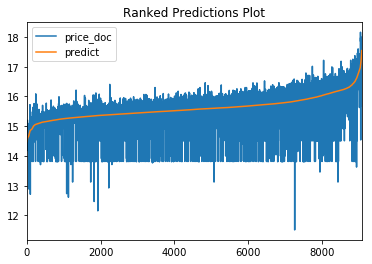

In [47]:
rf_preds1_val = rf_model1.predict(valid)
ranked_preds_plot('price_doc', valid, rf_preds1_val) # valid RMSE not so hot ...
rf_preds1_test = rf_model1.predict(test)

In [ ]:
rf_preds1_val = rf_model1.predict(valid)
ranked_preds_plot('price_doc', valid, rf_preds1_val) # valid RMSE not so hot ...
rf_preds1_test = rf_model1.predict(test)
gen_submission(rf_preds1_test) 
#  public leaderboard

### H2O Extremely random trees model

In [48]:
# initialize extra trees model
ert_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    seed=12345,
    model_id='ert_model',
    histogram_type='random') # <- this is what makes it ERT instead of RF

# train ert model
ert_model1.train(
    x=encoded_combined_nums,
    y='price_doc',
    training_frame=train,
    validation_frame=valid)

# print model information/create submission
print(ert_model1)

#Training RMSE: 0.45943399962738574

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  ert_model


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.21107960001361667
RMSE: 0.45943399962738574
MAE: 0.27654776705068884
RMSLE: 0.028580307840361925
Mean Residual Deviance: 0.21107960001361667

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.23437853710589307
RMSE: 0.4841265713694024
MAE: 0.28896246561435573
RMSLE: 0.030236003635527673
Mean Residual Deviance: 0.23437853710589307

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.21319674094337507
RMSE: 0.46173232607580666
MAE: 0.27932796062363346
RMSLE: 0.028715964136247513
Mean Residual Deviance: 0.21319674094337507
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.2793229,0.0024786,0.2772179,0.2842621,0.2764887
mean_residual_deviance,0.2132017,0.0054635,0.2045259,0.2232927,0.2117864
mse,0.2132017,0.0054635,0.2045259,0.2232927,0.2117864
r2,0.4099749,0.0103913,0.4307411,0.3988771,0.4003065
residual_deviance,0.2132017,0.0054635,0.2045259,0.2232927,0.2117864
rmse,0.4616622,0.0059034,0.4522454,0.4725386,0.4602026
rmsle,0.0287113,0.0003768,0.0281135,0.0294076,0.0286129


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-22 15:28:31,16 min 22.818 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-06-22 15:28:33,16 min 24.479 sec,1.0,0.5142457,0.2979621,0.2644486,0.5746864,0.3359816,0.3302645
,2017-06-22 15:28:35,16 min 26.259 sec,2.0,0.5206384,0.3068509,0.2710643,0.5228722,0.3142846,0.2733954
,2017-06-22 15:28:37,16 min 27.889 sec,3.0,0.5203004,0.3055518,0.2707125,0.5116072,0.3076641,0.2617419
,2017-06-22 15:28:38,16 min 29.517 sec,4.0,0.5137737,0.3026483,0.2639634,0.5036373,0.3025331,0.2536505
---,---,---,---,---,---,---,---,---,---
,2017-06-22 15:34:21,22 min 11.973 sec,182.0,0.4594992,0.2765433,0.2111395,0.4841328,0.2889640,0.2343846
,2017-06-22 15:34:23,22 min 14.188 sec,183.0,0.4594692,0.2765486,0.2111119,0.4841349,0.2889510,0.2343866
,2017-06-22 15:34:25,22 min 16.454 sec,184.0,0.4594544,0.2765453,0.2110984,0.4841352,0.2889644,0.2343869
,2017-06-22 15:34:27,22 min 18.685 sec,185.0,0.4594623,0.2765727,0.2111056,0.4841258,0.2889705,0.2343778



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq|sub_area_Tencode,47048.2421875,1.0,0.0708147
full_sq,26953.7617188,0.5728963,0.0405695
sub_area_Tencode|life_sq,26175.9257812,0.5563635,0.0393987
num_room|full_sq_per_room,26114.1953125,0.5550515,0.0393058
full_sq|build_year,24003.9628906,0.5101989,0.0361296
---,---,---,---
cafe_count_500_price_high,6.1851797,0.0001315,0.0000093
incineration_raion_Tencode,5.7001019,0.0001212,0.0000086
water_1line_Tencode,5.1562023,0.0001096,0.0000078
oil_chemistry_raion_Tencode,3.0478532,0.0000648,0.0000046



See the whole table with table.as_data_frame()



In [49]:
# save the model
model_path = h2o.save_model(model=ert_model1, path="/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel", force=True)

price_doc,predict
16.3881,16.1159
14.5087,15.3653
14.5087,15.3778
14.4307,15.4822
15.6561,15.3779
15.8824,15.5099
15.4642,15.3695
15.5905,15.2449
16.7224,15.9167
15.556,15.2741


id,price_doc
30474,4.79363e+06
30475,7.91118e+06
30476,4.82013e+06
30477,5.33236e+06
30478,4.87335e+06
30479,7.18906e+06
30480,4.45144e+06
30481,4.38338e+06
30482,4.0125e+06
30483,4.75677e+06


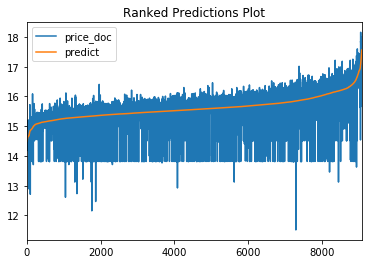

In [50]:
ert_preds1_val = ert_model1.predict(valid)
ranked_preds_plot('price_doc', valid, ert_preds1_val) # valid RMSE not so hot ...
ert_preds1_test = ert_model1.predict(test)
gen_submission(ert_preds1_test) 

#  public leaderboard

### H2O GBM model

In [51]:
# initialize H2O GBM
h2o_gbm_model = H2OGradientBoostingEstimator(
    ntrees = 10000,
    learn_rate = 0.05,
    sample_rate = 0.7, 
    col_sample_rate = 0.8,
    max_depth = 5,
    nfolds = 3,
    keep_cross_validation_predictions=True,
    stopping_rounds = 10,
    model_id='gbm_model',
    seed = 12345)

# execute training
h2o_gbm_model.train(x=encoded_combined_nums,
                    y='price_doc',
                    training_frame=train,
                    validation_frame=valid)

# print model information/create submission
print(h2o_gbm_model)

#Training RMSE: 0.3995149332787094

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_model


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.15961218191269164
RMSE: 0.3995149332787094
MAE: 0.2388394995750151
RMSLE: 0.02501694017566479
Mean Residual Deviance: 0.15961218191269164

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.23021018433422347
RMSE: 0.47980223460736765
MAE: 0.28288788724725816
RMSLE: 0.029981731806314655
Mean Residual Deviance: 0.23021018433422347

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.20891911569866078
RMSE: 0.4570767065807016
MAE: 0.2708378555290558
RMSLE: 0.028451360713217543
Mean Residual Deviance: 0.20891911569866078
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.2708321,0.0020952,0.2695125,0.2749363,0.2680475
mean_residual_deviance,0.2089223,0.0048875,0.2014072,0.2180932,0.2072666
mse,0.2089223,0.0048875,0.2014072,0.2180932,0.2072666
r2,0.4218004,0.0088108,0.4394215,0.4128747,0.4131049
residual_deviance,0.2089223,0.0048875,0.2014072,0.2180932,0.2072666
rmse,0.457018,0.0053323,0.4487841,0.4670045,0.4552654
rmsle,0.0284474,0.0003444,0.0279194,0.0290946,0.0283282


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-22 15:52:45,16 min 48.786 sec,0.0,0.6011072,0.4210946,0.3613298,0.6125376,0.4277439,0.3752023
,2017-06-22 15:52:48,16 min 51.446 sec,1.0,0.5894260,0.4110419,0.3474230,0.6023481,0.4185538,0.3628232
,2017-06-22 15:52:53,16 min 56.591 sec,4.0,0.5595245,0.3845794,0.3130677,0.5760800,0.3938475,0.3318682
,2017-06-22 15:52:58,17 min 1.601 sec,7.0,0.5357907,0.3633345,0.2870716,0.5556925,0.3743028,0.3087942
,2017-06-22 15:53:03,17 min 6.603 sec,10.0,0.5170506,0.3460632,0.2673414,0.5398903,0.3588344,0.2914815
---,---,---,---,---,---,---,---,---,---
,2017-06-22 15:57:18,21 min 21.228 sec,162.0,0.4029686,0.2410313,0.1623837,0.4801938,0.2833374,0.2305861
,2017-06-22 15:57:23,21 min 26.385 sec,165.0,0.4023074,0.2405695,0.1618512,0.4801147,0.2832014,0.2305102
,2017-06-22 15:57:28,21 min 31.716 sec,168.0,0.4013262,0.2399848,0.1610627,0.4799584,0.2830823,0.2303600
,2017-06-22 15:57:35,21 min 38.205 sec,172.0,0.4006004,0.2394052,0.1604807,0.4799175,0.2828581,0.2303208



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq|sub_area_Tencode,21997.9667969,1.0,0.5552647
sub_area_Tencode|life_sq,1055.9908447,0.0480040,0.0266549
full_sq|year,791.4220581,0.0359771,0.0199768
year,429.6901550,0.0195332,0.0108461
num_room|year,289.5960999,0.0131647,0.0073099
---,---,---,---
year_old|cafe_count_2000_price_2500,0.0,0.0,0.0
cafe_count_3000_price_500|cafe_count_2000_price_2500,0.0,0.0,0.0
cafe_count_3000_price_500|detention_facility_km,0.0,0.0,0.0
cafe_count_2000_price_2500|big_road1_km,0.0,0.0,0.0



See the whole table with table.as_data_frame()



In [52]:
# save the model
model_path = h2o.save_model(model=h2o_gbm_model, path="/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel", force=True)

price_doc,predict
16.3881,16.1678
14.5087,15.4116
14.5087,15.2646
14.4307,15.508
15.6561,15.3386
15.8824,15.5194
15.4642,15.3231
15.5905,15.1378
16.7224,15.9643
15.556,15.3553


id,price_doc
30474,5.69839e+06
30475,7.3929e+06
30476,4.89755e+06
30477,5.73469e+06
30478,5.14255e+06
30479,8.28925e+06
30480,4.86499e+06
30481,4.4799e+06
30482,4.17026e+06
30483,5.01473e+06


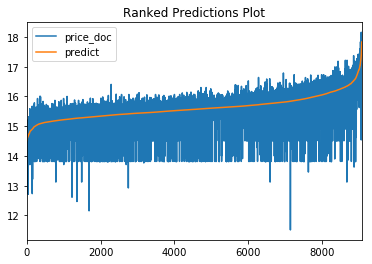

In [53]:
h2o_gbm_preds1_val = h2o_gbm_model.predict(valid)
ranked_preds_plot('price_doc', valid, h2o_gbm_preds1_val) # better validation error
h2o_gbm_preds1_test = h2o_gbm_model.predict(test)
gen_submission(h2o_gbm_preds1_test) 

#  public leaderboard

### H2O XGBoost

In [ ]:
# initialize XGB GBM
h2o_xgb_model = H2OXGBoostEstimator(
    ntrees = 10000,
    learn_rate = 0.05,
    sample_rate = 0.7, 
    col_sample_rate = 0.8,
    max_depth = 5,
    nfolds = 3,
    keep_cross_validation_predictions=True,
    stopping_rounds = 10,
    model_id='xgb_model',
    seed = 12345)

# execute training 
h2o_xgb_model.train(x=encoded_combined_nums,
                    y='price_doc',
                    training_frame=train,
                    validation_frame=valid)

# print model information/create submission
print(h2o_xgb_model)

#Training RMSE: 0.42416106883643906  sample_rate = 0.1
# RMSE: 0.4133154479408961 sample_rate = 0.7
# RMSE: 0.4045552475581364 learn_rate=0.05 sample_rate = 0.7

In [ ]:
h2o_xgb_preds1_val = h2o_xgb_model.predict(valid)
ranked_preds_plot('price_doc', valid, h2o_xgb_preds1_val) 
h2o_xgb_preds1_test = h2o_xgb_model.predict(test)
gen_submission(h2o_xgb_preds1_test) 

# 0.33357 on public leaderboard

In [ ]:
h2o_xgb_preds1_val = h2o_xgb_model.predict(valid)
ranked_preds_plot('price_doc', valid, h2o_xgb_preds1_val) 
h2o_xgb_preds1_test = h2o_xgb_model.predict(test)

In [60]:
# save the model
model_path = h2o.save_model(model=h2o_xgb_model, path="/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel", force=True)

### load saved model

In [ ]:
# load data
train = h2o.import_file('/Users/zwang/GWU/Kaggle/Housing_Mkt/data/newtrain.csv')
valid = h2o.import_file('/Users/zwang/GWU/Kaggle/Housing_Mkt/data/newvalid.csv')
test = h2o.import_file('/Users/zwang/GWU/Kaggle/Housing_Mkt/data/newtest.csv')

In [ ]:
def get_type_lists(frame=train, rejects=['id', 'price_doc']):   
    nums, cats = [], []
    for key, val in frame.types.items():
        if key not in rejects:
            if val == 'enum':
                cats.append(key)
            else: 
                nums.append(key)                
    print('Numeric =', nums)                
    print()
    print('Categorical =', cats)
    
    return nums, cats

In [ ]:
encoded_combined_nums, cats = get_type_lists(frame=train)

In [41]:
# load the model
rf_model1 = h2o.load_model("/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel/rf_model")
ert_model1 = h2o.load_model("/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel/ert_model")
h2o_gbm_model = h2o.load_model("/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel/gbm_model")
#h2o_xgb_model2 = h2o.load_model("/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel2/xgb_model")

In [42]:
h2o_gbm_preds1_val = h2o_gbm_model.predict(valid)
h2o_gbm_preds1_test = h2o_gbm_model.predict(test)

In [43]:
rf_preds1_val = rf_model1.predict(valid)
rf_preds1_test = rf_model1.predict(test)

In [44]:
ert_preds1_val = ert_model1.predict(valid)
ert_preds1_test = ert_model1.predict(test)

In [ ]:
h2o_xgb_model2 = h2o.load_model("/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel2/xgb_model")

In [ ]:
h2o_xgb_preds1_val = h2o_xgb_model2.predict(valid)
h2o_xgb_preds1_test = h2o_xgb_model2.predict(test)

In [ ]:
h2o_xgb_model2

### Train H2O stacked ensemble

In [54]:
stack = H2OStackedEnsembleEstimator(training_frame=train, 
                                    validation_frame=valid,
                                    base_models=[rf_model1, ert_model1, 
                                                 h2o_gbm_model])

stack.train(x=encoded_combined_nums,
            y='price_doc',
            training_frame=train,
            validation_frame=valid)

# print model information/create submission
print(stack)

# stacking without xgb
# RMSE: 0.39708713580391003
# 0.32659 in public leaderboard

# stacking all four model
# 


Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_model_python_1498154664878_2
No model summary for this model


ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.15029133869917316
RMSE: 0.387674268812328
MAE: 0.23202236477425303
RMSLE: 0.024303754747282025
R^2: 0.5840605306934936
Mean Residual Deviance: 0.15029133869917316
Null degrees of freedom: 21377
Residual degrees of freedom: 21374
Null deviance: 7724.509155315873
Residual deviance: 3212.928238710924
AIC: 20162.986209528957

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.22988971584685264
RMSE: 0.4794681593670769
MAE: 0.2814473317648257
RMSLE: 0.02996763643569494
R^2: 0.38711614662976157
Mean Residual Deviance: 0.22988971584685264
Null degrees of freedom: 9085
Residual degrees of freedom: 9082
Null deviance: 3409.0880138555112
Residual deviance: 2088.777958184503
AIC: 12437.117413048463



In [56]:
model_path = h2o.save_model(model=stack, path="/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel", force=True)

price_doc,predict
16.3881,16.1778
14.5087,15.4029
14.5087,15.2739
14.4307,15.4946
15.6561,15.3365
15.8824,15.5138
15.4642,15.3316
15.5905,15.1591
16.7224,15.9748
15.556,15.3271


id,price_doc
30474,5.42643e+06
30475,7.69591e+06
30476,4.83971e+06
30477,5.61104e+06
30478,5.05391e+06
30479,7.96666e+06
30480,4.71819e+06
30481,4.42609e+06
30482,4.09199e+06
30483,4.9342e+06


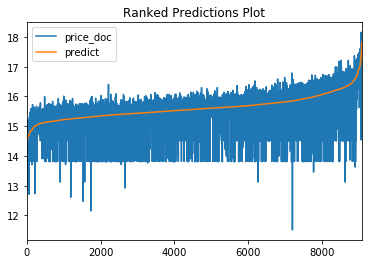

In [55]:
stack_preds1_val = stack.predict(valid)
ranked_preds_plot('price_doc', valid, stack_preds1_val) 
stack_preds1_test = stack.predict(test)
gen_submission(stack_preds1_test)

In [57]:
stackall = H2OStackedEnsembleEstimator(training_frame=train, 
                                    validation_frame=valid,
                                    base_models=[rf_model1, ert_model1, 
                                                 h2o_gbm_model,h2o_xgb_model])

stackall.train(x=encoded_combined_nums,
            y='price_doc',
            training_frame=train,
            validation_frame=valid)

# print model information/create submission
print(stackall)

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_model_python_1498154664878_3
No model summary for this model


ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.1540126929638647
RMSE: 0.39244450940720865
MAE: 0.2351103821869461
RMSLE: 0.02458876481616801
R^2: 0.573761479987348
Mean Residual Deviance: 0.1540126929638647
Null degrees of freedom: 21377
Residual degrees of freedom: 21374
Null deviance: 7724.509155315873
Residual deviance: 3292.483350181499
AIC: 20685.878247572768

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.22946625425236963
RMSE: 0.4790263607071845
MAE: 0.28186667338907806
RMSLE: 0.029938237916001417
R^2: 0.38824509131884877
Mean Residual Deviance: 0.22946625425236963
Null degrees of freedom: 9085
Residual degrees of freedom: 9082
Null deviance: 3409.0880138555112
Residual deviance: 2084.9303861370304
AIC: 12420.365380255407



In [59]:
model_path = h2o.save_model(model=stackall, path="/Users/zwang/GWU/Kaggle/Housing_Mkt/mymodel", force=True)

price_doc,predict
16.3881,16.0117
14.5087,15.4108
14.5087,15.2753
14.4307,15.4705
15.6561,15.3623
15.8824,15.4476
15.4642,15.2392
15.5905,15.1048
16.7224,15.9043
15.556,15.3064


id,price_doc
30474,5.46227e+06
30475,7.91218e+06
30476,4.83752e+06
30477,5.34608e+06
30478,5.02407e+06
30479,7.92004e+06
30480,4.63137e+06
30481,4.5195e+06
30482,4.3593e+06
30483,5.01032e+06


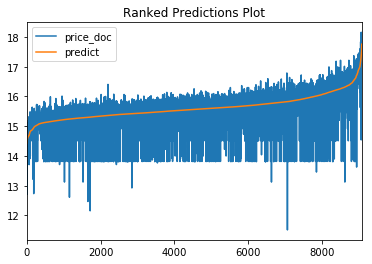

In [58]:
stackall_preds1_val = stackall.predict(valid)
ranked_preds_plot('price_doc', valid, stackall_preds1_val) 
stackall_preds1_test = stackall.predict(test)
gen_submission(stackall_preds1_test)

### Blending

In [ ]:
import os

def pred_blender(dir_, files):
    
    """ Performs simple blending of prediction files. 
    
    :param dir_: Directory in which files to be read are stored.
    :param files: List of prediction files to be blended.
    
    """
    
    # read predictions in files list and cbind
    for i, file in enumerate(files):
        if i == 0:
            df = pd.read_csv(dir_ + os.sep + file).drop('price_doc', axis=1)
        col = pd.read_csv(dir_ + os.sep + file).drop('id', axis=1)
        col.columns = ['price_doc' + str(i)]
        df = pd.concat([df, col], axis=1)
        
    # create mean prediction    
    df['mean'] = df.iloc[:, 1:].mean(axis=1)
    print(df.head())
        
    # create time stamp
    time_stamp = re.sub('[: ]', '_', time.asctime())        
        
    # write new submission file    
    df = df[['id', 'mean']]
    df.columns = ['id', 'price_doc']
    
    # save file for submission
    sub_fname = wd+'/submission_' + str(time_stamp) + '.csv'
    df.to_csv(sub_fname, index=False)

In [ ]:
# create blending
pred_blender(wd,
            ['submissionRF_Mon_Jun_19_22_31_58_2017.csv',
             'submissionERF_Mon_Jun_19_22_56_05_2017.csv',
             'submissionGBM_Tue_Jun_20_00_52_56_2017.csv',
             'submissionXGB2_Wed_Jun_21_08_32_32_2017.csv'])

#### Shutdown H2O

In [61]:
# Shutdown H2O - this will erase all your unsaved frames and models in H2O
h2o.cluster().shutdown(prompt=True)

Are you sure you want to shutdown the H2O instance running at http://127.0.0.1:54321 (Y/N)? Y
